# Common Training Errors

## Overfitting  

As stated in milestone 3, the cause of overfitting is having the network learn the training data and not generalizing to new data. To detect overfitting you need to look at the results from your training and validation data sets. Once you start to see the validation errors rise while the training errors fall you are starting to over fit.  

To simulate overfitting (over fit to your training data so your network won't generalize to real data) I am going to create the exact same neural network from milestone 3

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# This method will be used in place of the normal output. This is cleaner in my opinion
class PrintDoc(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')
    
def Build_Model():
  model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[6]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)                                   
  ])
  
  opt = keras.optimizers.RMSprop()
  m = [
       keras.metrics.MeanAbsoluteError(),
       keras.metrics.Accuracy(),
       keras.metrics.MeanSquaredError()
  ]
  l = keras.losses.MeanSquaredError()
  
  model.compile(loss=l, optimizer=opt, metrics=m)
  return model

overfitmodel = Build_Model()

Generate the DataFrames

In [ ]:
#Load the data set from the last milestone 1
column_names = ['Date','HomeTeam','HomeScore','AwayTeam','AwayScore',
                'HomeScoreAverage','HomeDefenseAverage','AwayScoreAverage','AwayDefenseAverage',
                'Result']

games_csv = 'https://liveproject-resources.s3.amazonaws.com/other/deeplearningbasketballscores/Games-Calculated.csv'
all_data = pd.read_csv(games_csv, header=None, names=column_names)

# Drop the columns that we are NOT going to train on
all_data.drop(['Date','HomeTeam','HomeScore','AwayTeam','AwayScore'], axis=1, inplace=True)
all_data.tail()

#Break it into 80/20 splits
train = all_data.sample(frac=0.8, random_state=0)
test = all_data.drop(train.index)
print('Training Size: %s' % train.shape[0])
print('Testing Size: %s' % test.shape[0])

#Create the labels
train_labels = train.pop('Result')
test_labels = test.pop('Result')

# Normalize the data
mean = train.mean(axis=0)
train_data = train - mean
std = train_data.std(axis=0)
train_data /= std

test_data = test - mean
test_data /= std

Training Size: 16128
Testing Size: 4032


## Over training  

One thing to notice here is that I am using 1,000 epochs to train this network. What happens with a neural network with too much training is that it starts to work for just the data is knows. If you look at the resulting graph you can start to see the error for the validation starts to rise while the error for the training drops.

In [ ]:
history = overfitmodel.fit(train_data, train_labels, epochs=1000, validation_split=0.2, verbose=0, callbacks=[PrintDoc()])

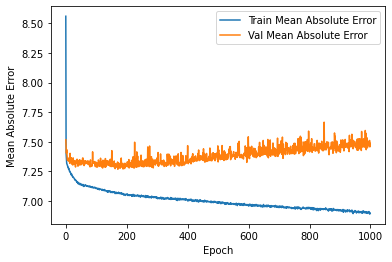

In [ ]:
# Check the results
# Create a DataFrame from the output from the fit method
hist = pd.DataFrame(history.history)
# Create an epoch column and set it to the epoch index
hist['epoch'] = history.epoch

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history['epoch'], history['mean_absolute_error'],
           label='Train Mean Absolute Error')
  plt.plot(history['epoch'], history['val_mean_absolute_error'],
           label = 'Val Mean Absolute Error')
  plt.legend()
  #plt.ylim([0,1])
  plt.show()

plot_history(hist)

## Graph Meaning  
Using the guide from milestone 3 we can see that we are overfitting. The first thing I check is to look if the validation error rate is starting to rise again. This graph makes it very clear that we are overfitting to the training data.